# TABLAS Y RELACIONES

## En este cuadernillo, lo que se buscará hacer es cargar el resto de los archivos de la carpeta de logistica, aplicar correcciones a los datos, asegurar la conectividad entre distintas tablas y en caso de ser necesario generar algunas nuevas o modificarlas en función de ayudar a una posterior visualización de los datos.

En partilucar las tablas que se van a utilizar, se pueden descargar de la pagina https://github.com/raaraya1/University-Projects/tree/main/Logistics/Datos, estas poseen las siguiente estructura.

In [6]:
import pandas as pd

nombre_archivo = ['DCs', 'customers', 'detergents', 'orders', 'plants', 'routes_available', 'routes_endtoend', 'routes_segment', 'variable_costs']
url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/'

for nombre in nombre_archivo:
    archivo = pd.read_csv(url + nombre + '.csv', sep=';')
    df = pd.DataFrame(archivo)
    print(nombre, '\n', df, '\n')
    



DCs 
     DCID DCLocationLatitude DCLocationLongitude  \
0  DC001     -1.167.114.585      -8.322.489.278   
1  DC002     -8.195.947.549       7.291.626.950   
2  DC003     -1.422.731.698       6.443.633.751   
3  DC004      4.358.105.746       8.986.685.836   
4  DC005      8.411.115.264      -3.458.885.675   

   DCTransportationCapacityLiters  HandlingCostPerLiter  
0                              88                    48  
1                              37                    96  
2                              58                    82  
3                              48                    29  
4                              93                    49   

customers 
     CustomerID CustomerLocationLatitude CustomerLocationLongitude
0  Customer001           -6.974.150.410             0.572.172.540
1  Customer002           -1.774.631.895             0.771.807.615
2  Customer003            6.741.158.818             7.906.606.020
3  Customer004           -7.191.233.417            -2.539.319

## Observando los datos contenidos en las tablas, podemos empezar a pensar en las informaciones que nos podrian llegar a resultar utiles para la elaboración del informe.

**En este sentido se establecen los siguientes objetivos:**
 - Visualizar las locaciones de los centros de distribucion (DC), plantas y clientes. (buscar la manera de poder identificarlos por colores)
 - Visualizar la demanda de productos (esta es posible de elaborar con la tabla 'orders')
 - Visualizar capacidad productivas de las plantas por productos (se obtiene de la tabla 'plants')
 - Visualizar costos de producccion por planta y por producto (esto se obtiene de la tabla 'variable_costs')
 - Armar y visualizar los costos de las rutas por unidad de producto transportado, distinguiendo aquellas rutas que utilicen el tren dentro de su transporte (**observar que estos costos no varian segun el producto transportado**)

### 1) Visualizar Locaciones (DC, Plantas y Clientes)

In [17]:
# visualizar las locaciones
# veamos primero los CD

import pandas as pd
# cargar archivo
url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/'
archivo = pd.read_csv(url + 'DCs' + '.csv', sep=';')
df = pd.DataFrame(archivo)

# recortar tabla
DC = df[['DCID', 'DCLocationLatitude', 'DCLocationLongitude']]

# corregir los '.' (transformar a numero, divir por 100.000.000, luego pasar a texto)
# latitude
for i, valor in enumerate(DC['DCLocationLatitude']):
    valor = float(valor.replace('.', ''))/100000000
    DC['DCLocationLatitude'][i] = valor
    
# longitude
for i, valor in enumerate(DC['DCLocationLongitude']):
    valor = float(valor.replace('.', ''))/100000000
    DC['DCLocationLongitude'][i] = valor

DC
    


C:\Users\rodrigo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,DCID,DCLocationLatitude,DCLocationLongitude
0,DC001,-11.671146,-83.224893
1,DC002,-81.959475,72.916269
2,DC003,-14.227317,64.436338
3,DC004,43.581057,89.866858
4,DC005,84.111153,-34.588857


El resultado, luego si lo llegasemos a observar en el informe tendria la siguiente estructura. (**Las ubicaciones fueron generadas al azar**)
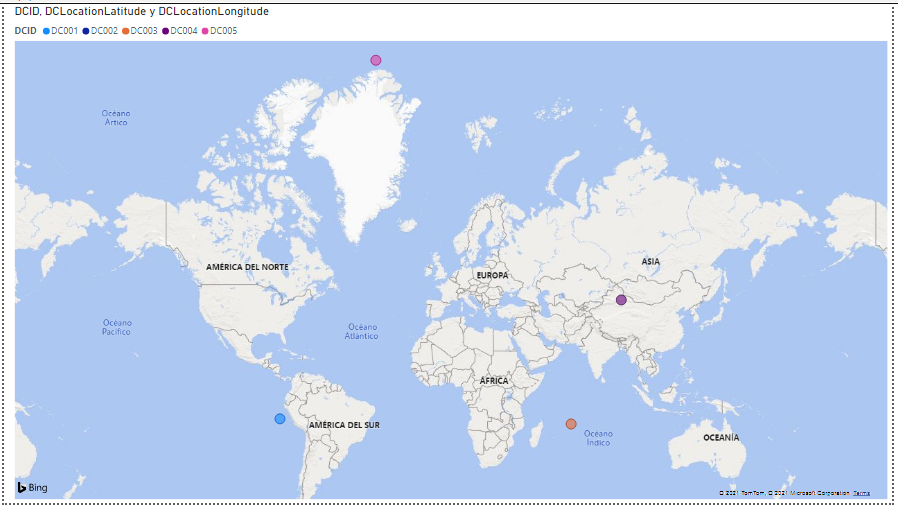

### Estas modificaciones tambien son posibles de ejecutar desde el menu de Power Querry.
Para hacer esto lo primero es dirigirnos a la tabla 'DCs', seleccionar una columna (la columna '', por ejemplo) y en la pestaña 'Transformar' ir a la sección de 'Columna numero'. En esta hacer click en 'Estandar'.
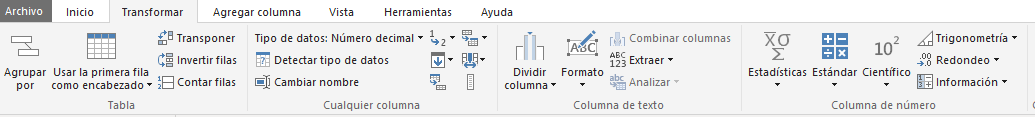

De la lista despleglable, seleccionar la opcion 'Dividir'.
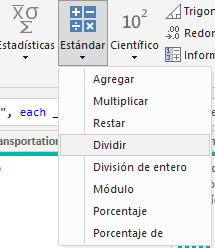

Esta abre uan nueva pestaña para colocar el numero con el cual dividiremos todos loas datos de la columna (**Esto se hacce para corregir el formato solicitado para la generacion del objeto de mapa en el informe**)
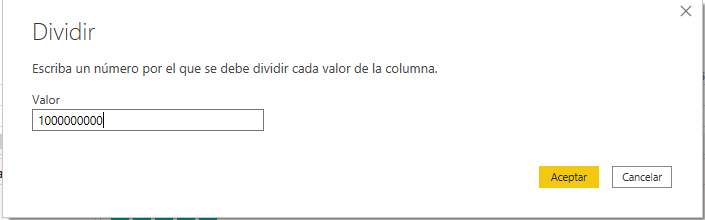

Ya con esto podremos notar que en el panel de 'PASOS APLICADOS', apareceran los referentes a la division.
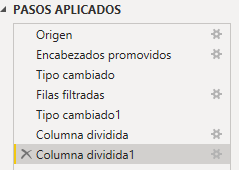

### Estos mismos pasos son posibles de replicar para las tablas 'plants' y 'customers', pero aun nos hace falta generar una visualizacion que incluya todas estas locaciones, asignandole un color distintivo segun el tipo de localidad (planta, centro de distribucion o cliente).


## Mapas individuales
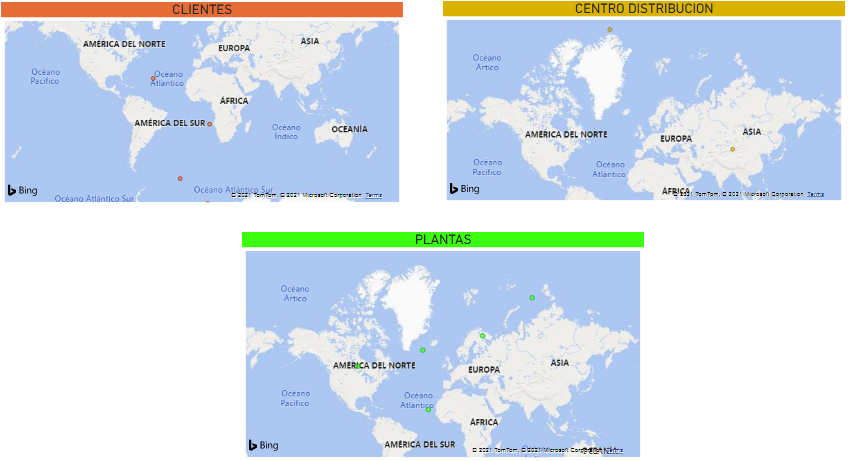


### Para la generación del mapa conjunto (que incluya las locaciones de las plantas, los centros de dictribución y los clientes) creo que lo mas facil, es generar una nueva tabla que incluya todas las locaciones y agregar una columna adicional para luego poder segmentar por tipo de lugar.


In [27]:
import pandas as pd

url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/'

#nombre_archivo = ['DCs', 'customers', 'detergents', 'orders', 'plants', 'routes_available', 'routes_endtoend', 'routes_segment', 'variable_costs']

# extraer locacion de plantas
archivo_plantas = pd.read_csv(url + 'plants' + '.csv', sep=';')
plantas = pd.DataFrame(archivo_plantas)

# Correciones a plantas
latitud_plantas = []
for i, valor in enumerate(plantas['PlantLocationLatitude']):
    item = float(valor.replace('.', ''))/100000000
    latitud_plantas.append(item)
    
longitud_plantas = []
for i, valor in enumerate(plantas['PlantLocationLongitude']):
    item = float(valor.replace('.', ''))/100000000
    longitud_plantas.append(item)

    
# extraer locacion de cetros de distribucion
archivo_DCs = pd.read_csv(url + 'DCs' + '.csv', sep=';')
DCs = pd.DataFrame(archivo_DCs)

# Correciones a centro de distribucion
latitud_DCs = []
for i, valor in enumerate(DCs['DCLocationLatitude']):
    item = float(valor.replace('.', ''))/100000000
    latitud_DCs.append(item)

longitud_DCs = []
for i, valor in enumerate(DCs['DCLocationLongitude']):
    item = float(valor.replace('.', ''))/100000000
    longitud_DCs.append(item)
    
    
# extraer locacion de clientes
archivo_clientes = pd.read_csv(url + 'customers' + '.csv', sep=';')
clientes = pd.DataFrame(archivo_clientes)

# correcciones a clientes
latitud_clientes = []
for i, valor in enumerate(clientes['CustomerLocationLatitude']):
    item = float(valor.replace('.', ''))/100000000
    latitud_clientes.append(item)

longitud_clientes = []
for i, valor in enumerate(clientes['CustomerLocationLongitude']):
    item = float(valor.replace('.', ''))/100000000
    longitud_clientes.append(item)

    
# Ahora que tenemos todas las listas con los datos corregidos, toca armar la tabla.
# Identificadores de las tablas
inde_plantas = plantas['PlantID'].values.tolist()
inde_DCs = DCs['DCID'].values.tolist()
inde_clientes = clientes['CustomerID'].values.tolist()

# generar la tabla
lista_tabla = []

# agregar plantas
for i in range(len(inde_plantas)):
    item = [inde_plantas[i], latitud_plantas[i], longitud_plantas[i], 'planta']
    lista_tabla.append(item)

# agregar DCs
for i in range(len(inde_DCs)):
    item = [inde_DCs[i], latitud_DCs[i], longitud_DCs[i], 'DC']
    lista_tabla.append(item)

# agregar plantas
for i in range(len(inde_clientes)):
    item = [inde_clientes[i], latitud_clientes[i], longitud_clientes[i], 'cliente']
    lista_tabla.append(item)

tabla_locaciones = pd.DataFrame(lista_tabla)

# agregar encabezado
tabla_locaciones.columns = ['identificador', 'latitud', 'longitud', 'tipo']

tabla_locaciones
 



,identificador,latitud,longitud,tipo
0,Plant001,67.954580,30.951434,planta
1,Plant002,18.381702,-23.863306,planta
2,Plant003,61.779107,-29.667373,planta
3,Plant004,78.660312,81.440165,planta
4,Plant005,53.053973,-95.240787,planta
5,DC001,-11.671146,-83.224893,DC
6,DC002,-81.959475,72.916269,DC
7,DC003,-14.227317,64.436338,DC
8,DC004,43.581057,89.866858,DC
9,DC005,84.111153,-34.588857,DC


Nota: Este codigo se puede ejecutar directamente para la importación de datos mediante un script de Python. Solo se necesita cambiar el url por la direccion de la carpeta que contiene los archivos. Luego de cargarse aparecerá una lista de tablas para importar, en esta **solo escoger la ultima**.
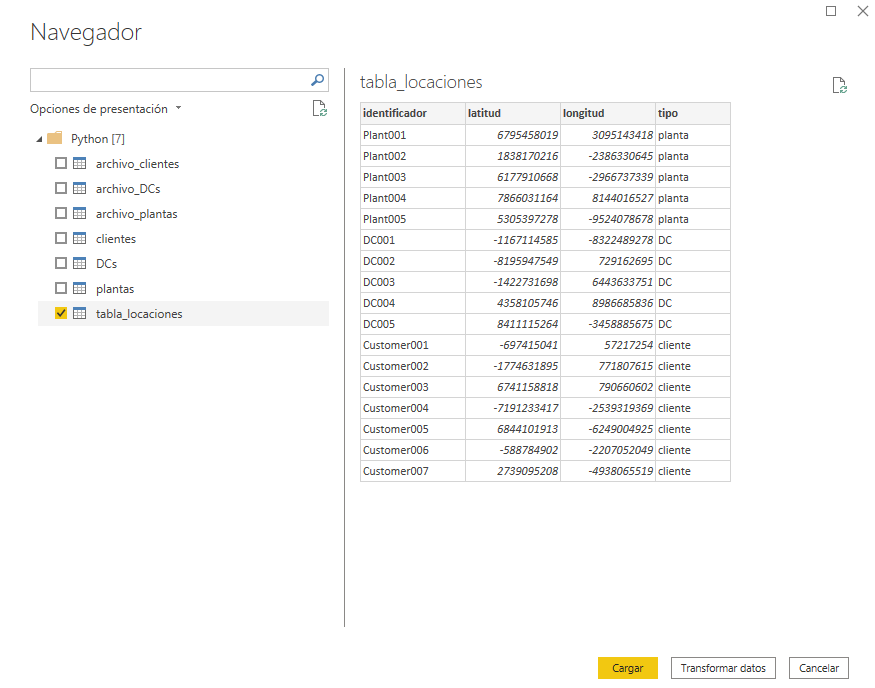


## Como resultado se puede obtener algo asi.
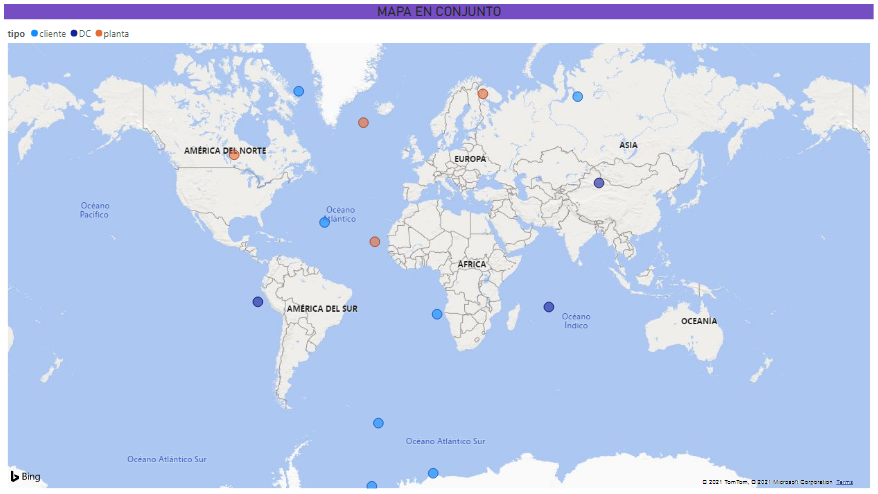

# Si bien esto se puede realizar al momento de la importación de datos, tambien resulta interesante observar como se podria realizar esto mismo **desde las opciones de PowerBi**. (Nota: Si se trabaja con la tabla de PowerBi, esta se encontrará sujeta a los cambios que se realicen a los archivos originales de donde se extraen los datos)

## En este sentido, lo primero sera generar una tabla nueva a partir de una referencia, para asi al momento de actualizar información, esta tambien se vea afectada. Este proceso lo tendremos que realizar a las tres tablas donde se encuentran almacenados los datos (plants, DCs y customers)

A continuacion se muestra la tabla generada a partir de la referencia de la tabla 'DCs'. A esta se le aplicaron los siguientes cambios para asi conseguir una estructura general deseada.
- Eliminacion de columnas (Para asi conservar el id, la latitud y la longitud)
- Insertar una columna adicional (columna a partir de ejemplos, **util para repetir un dato por todas las filas**)
- Cambiar los nombres de los encabezados a un formato estandar ('Identificador', 'Latitud', 'Longitud', ´Tipo')
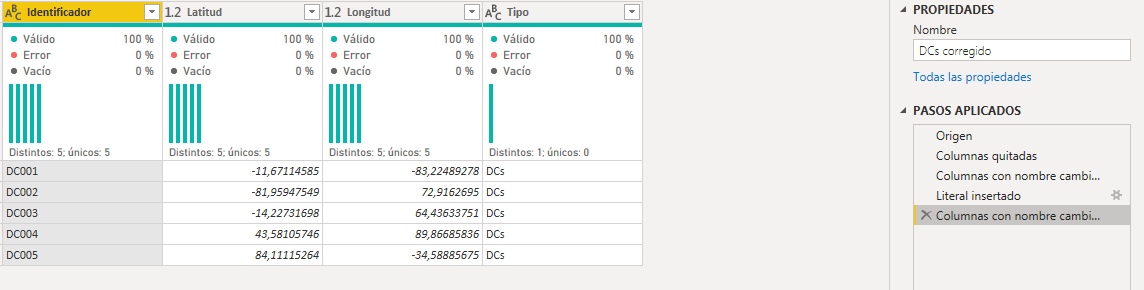

### Este proceso se repitio igual para las tablas plants y customers. Estableciendose una estructura en comun para estas nuevas tablas.
Plantas
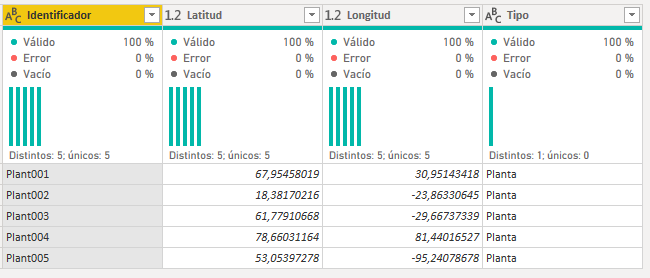

Clientes
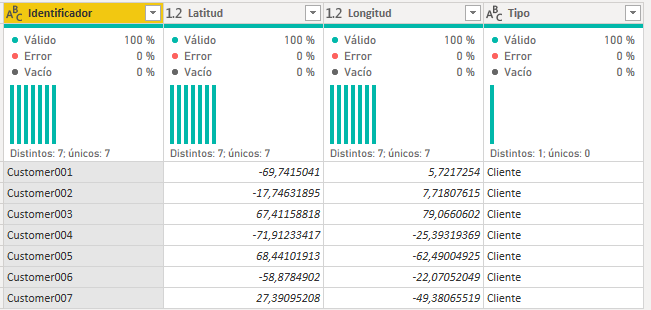

### Ahora que tenemos las tablas corregidas de donde extraeremos los datos, toca crear una tabla nueva que almacene toda esta información. 
En el menu, seleccionar la opcion 'Especificar datos' y crear una tabla vacia.
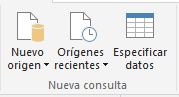

Luego en el menu, seleccionar la opcion de 'Combinar' -> 'Anexar consultas'.
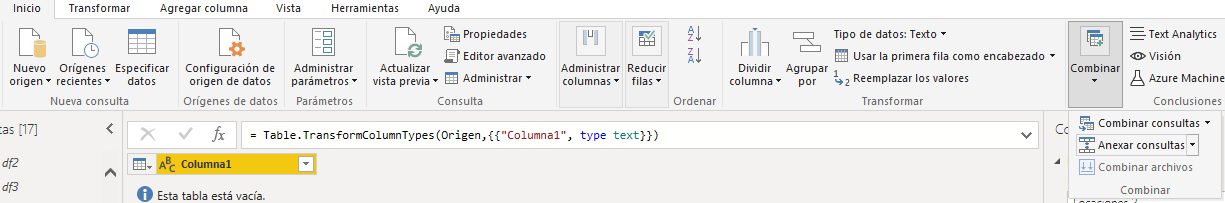

En esta seleccionar la opcion para anexar mas de tres consultas, seleccionar y agregar las tablas corregidas previamente.
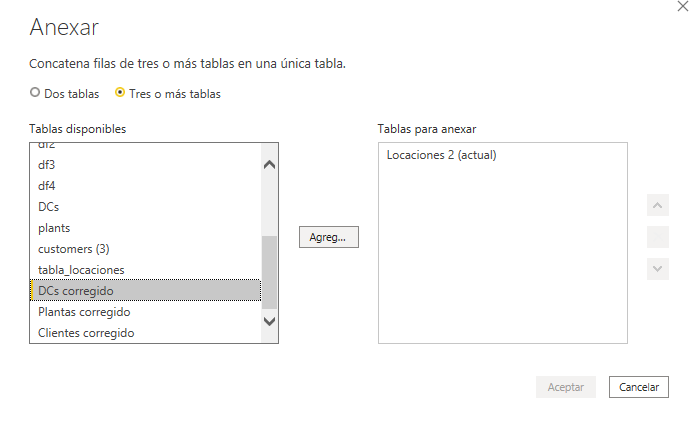

Una vez realizado esto, se nos generará la siguiente tabla.
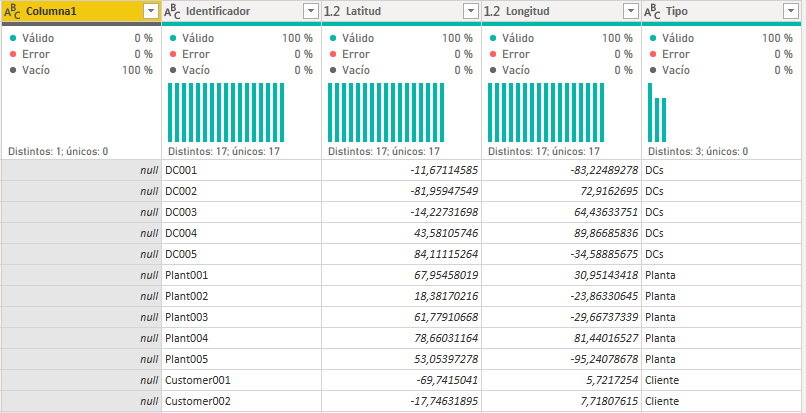

Por ultimo, eliminar la primera columna que no aporta mayor informacion al modelo.
Listo, ahora ya tenemos una tabla que posee los mismo datos y estructura que la tabla que elaboramos desde Python. Podemos corroborar las relaciones generadas en el menu 'Vista' -> 'Dependencia de consultas'.
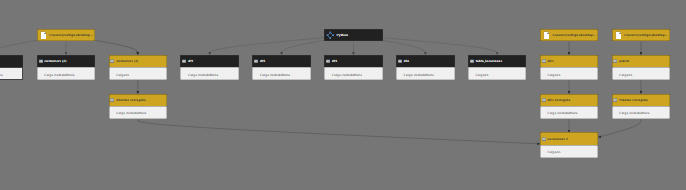

No se alcanza a notar muy bien, pero esta posee una estructura que pasa primero por los datos orininales, luego por las tablas generadas, luego por las tablas corregidas y por ultimo convergiendo en la ultima tabla elaborada. (**Nota: De cargar estos datos al modelo se recomeienda deshabilitar la opcion de carga para las tablas de correciones, ya que no aportaran mayor informacion a este**)


## 2) Visualizar la demanda de productos 

### En particular, para el desarrollo de esta visualización no es necesario transformar o modificar los datos de entrada, ya que basta trabajar con la tabla de 'orders'. Esta tabla ya cuenta con la información necesaria para el calculo de las unidades de productos solicitas por cliente.

Esta tabla posee la siguiente estrucuctura.

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/'
nombre = 'orders'
archivo = pd.read_csv(url + nombre + '.csv', sep=';')
ordenes = pd.DataFrame(archivo)

ordenes

,OrderID,ProductID,CustomerID,QuantityLiters
0,Order001,Det004,Customer001,9
1,Order002,Det002,Customer007,19
2,Order003,Det001,Customer003,19
3,Order004,Det002,Customer005,16
4,Order005,Det005,Customer002,2
5,Order006,Det003,Customer007,5
6,Order007,Det003,Customer002,1
7,Order008,Det003,Customer005,16
8,Order009,Det005,Customer007,9
9,Order0010,Det001,Customer002,13


### De esta manera, con esta tabla nos es suficiente para trabajar desde el modo informe.
Para ayudar a la visualización de la infomación se utilizará principalmente los siguientes elementos.
 - Grafico de barras (segmentado por clientes y productos)
 - Filtros de producto y cliente
 - Tarjeta para visualizar el total de demanda del grupo filtrado.

Este apartado del informe se observaría como a continuación.
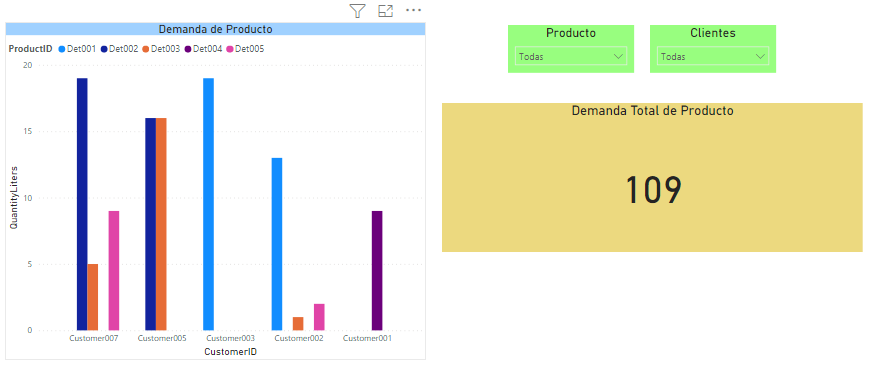

De hecho podemos corroborar rapidamente que el valor mostrado en la tarjeta corresponde al total de productos demandados.

In [6]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/'
nombre = 'orders'
archivo = pd.read_csv(url + nombre + '.csv', sep=';')
ordenes = pd.DataFrame(archivo)

Total_productos = np.sum(ordenes['QuantityLiters'])
print('Total_productos: ', Total_productos)

Total_productos:  109


## Para generar la visualización en el informe

### Grafico
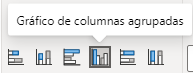
Cargar con los siguientes campos seleccionados.
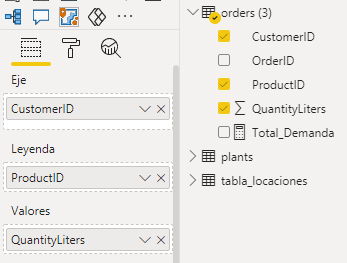

### Filtros
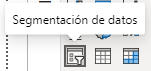
Cargar unicamente con el campo del filtro. (en este caso correponde al campo de 'ProductID')
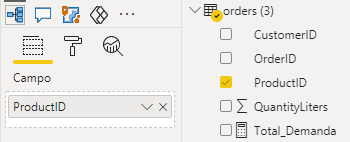

### Tarjeta
Antes de crear la tajeta, debemos crear la medida que calcula el total de productos.
Seleccionar la tabla 'orders', luego ir a 'Herramientas de tabla', luego dar en 'Nueva medida'.
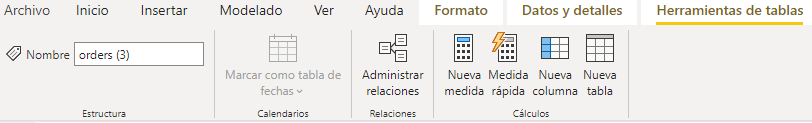
En esta podemos crear la funcion para sume los valores de la columna.
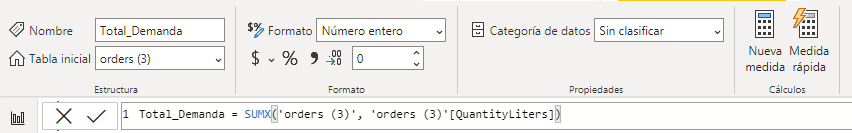
Por ultimo crear un objeto de tarjeta, seleccionando como unico campo la medida que acabamos de crear.
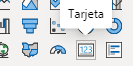


## 3) Visualizar capacidad productivas de las plantas

### Para el desarrollo de este ejercicio, resultó ser bastante similar al anterior, ya que bastaba trabajar con los datos de la tabla 'Plants'. Asimismo, se modificaron los datos contenidos en la tabla, ya que algunos de estos no eran nuevamente necesario cargarse (los datos de localización, por ejemplo). De esta manera se cargo la sigueinte tabla.(Contiene mas que nada información sobre capacidades productivas y capacidades de transporte)

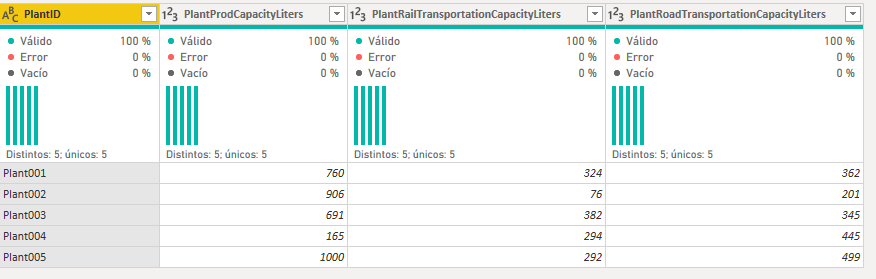

**Nota: En el camino se me ocurrio que podia ser interesante o importante verificar si las capacidades productivas de las palntas y las capacidades de transporte (tren y calle) eran lo suficientemente grandes para satisfacer la demanda de productos. Esto cobra relevancia en el sentido que, para el modelo de optimizacion que se habia propuesto para este trabajo, se debia asegurar que existiensen las condiciones necesarias para satisfacer la demanda. De esta manera, se agregan a esta visualización.**
 - Las visualizaciones anteriores
 - Un grafico de barra que marca las capacidades productivas individuales de cada planta.
 - Un filtro para marcar las plantas (**Nota: Si se quiere marcar mas de una opcion, esto se puede hacer manteniendo presionado la tecla Ctrl**)
 - Dos tarjetas nuevas que marcan los ratios sobre las capacidades productivas y de transporte, por sobre la demanda de productos.

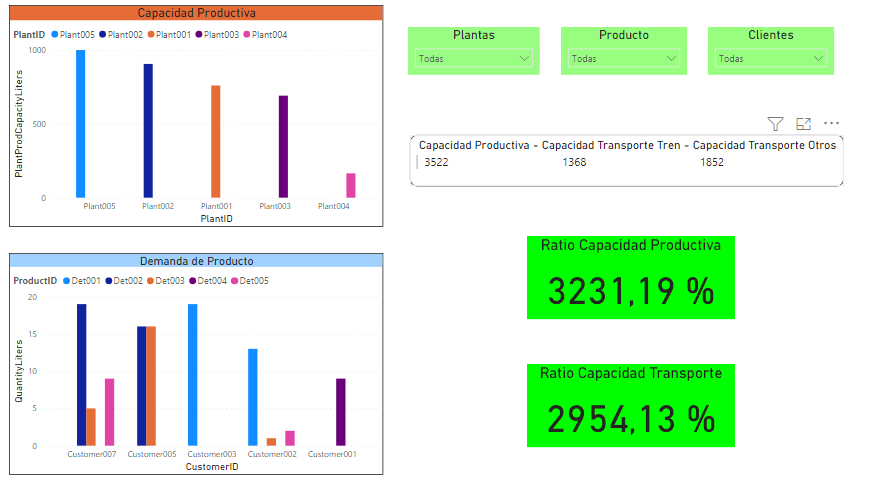


En particular, lo mas novedoso de esta visualización correponde a los nuevas medidas elaboradas y el formato condicioanl utilizado para el color de la tarjeta (Esta cambiará a un color 'Rojo' si se llegase a presentar un procentaje menor al 100%, en otras palabras esto quiere decir que numerador (la capacidad) se ve superado por su denominador (demanda de productos))

**Ratio_Capacidad_Productiva**


**Ratio_Capacidad_Transporte**
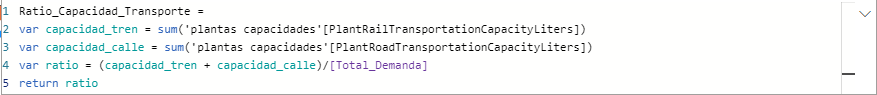

Nota: Como una recomendación, si la extensión del codigo de la medida va a ser muy largo, se hace razonable escribirlo como aparece en la ultima imagen, haciendo uso de variables y escribiendo el codigo hacia abajo (**Recordar: Para hacer un salto de linea es necesario apretar Shift + Enter**)

Por ultimo, para realizar un formato condicional sobre el color de la tarjeta es necesario ir al objeto -> Formato -> Fondo -> Fx. Esto abrirá la siguiente pestaña.
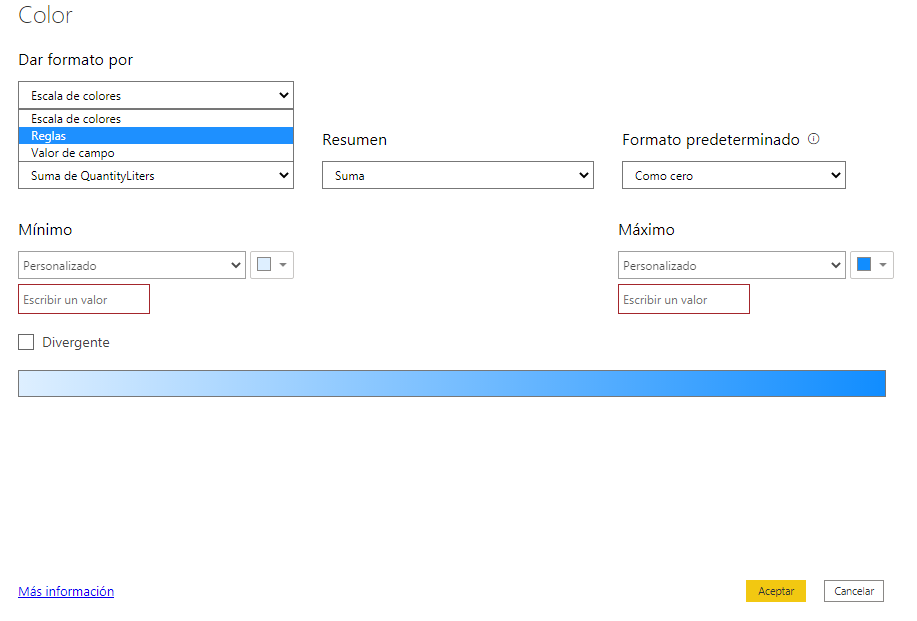

En la opcion 'Dar formato por' seleccionar 'Reglas'. En esta es bastante intuitivo como crear las reglas segun valores mayores o menores que otros. (**Observación: Al momento de seleccionar un color personaizado, puede ser util recordar que en los tres espacios donde se marcan 255|255|255 correponden a la configuracion RGB (Red, Green, Blue) con lo cual si se busca un color rojo puro, basta marcar 255|0|0, en cambio para el verde seria 0|255|0.**)

## 4) Visualizar costos de producccion por planta y por producto

In [4]:
# Revisemos un poco como es la tabla 'variabla costs'
import pandas as pd

url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/'
nombre_archivo = 'variable_costs'

archivo = pd.read_csv(direc + nombre_archivo + '.csv', sep=';')
costos_produccion = pd.DataFrame(archivo)

costos_produccion

,PlantID,DetergentID,costPerliter
0,Plant001,Det001,20
1,Plant002,Det001,20
2,Plant003,Det001,20
3,Plant004,Det001,20
4,Plant005,Det001,20
5,Plant001,Det002,20
6,Plant002,Det002,20
7,Plant003,Det002,20
8,Plant004,Det002,20
9,Plant005,Det002,20


## De forma inmediata podemos notar que esta estructura de datos carece de una columna con valores unicos que sirva como identificador. Es por esta razon, que lo primero a realizar sera crear esta columna a partir de la mazcla de la columa de plantas y la columna productos.

Una forma rapida de hacer esto desde PowerBi, es utilizar la opcion para agregar una columna a la tabla a partir de un ejemplo. Como resultado se obtendrá la siguiente tabla, en la cual podemos corroborar que los valores de la primera fila son todos unicos.
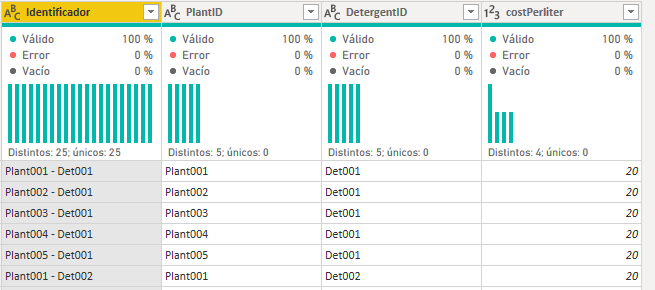

Lo siguiente será generar un apartado en el informe como el siguiente.
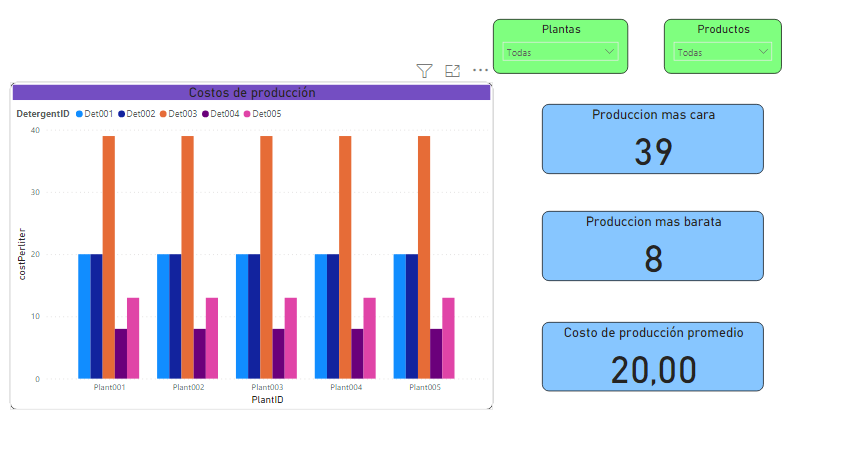

Para esto ya se utilizaron varias de los objetos que ya hemos visto. Como una novedad se rellenaron los campos de las tarjetas con funciones predefinidas como 'Maximo' , 'Minimo' y 'Promedio'. **Nota: Realizando un analisis rapido de los costos (corroborando tanto de los datos de la tabla como de las variaciones observadas con los cambios de los filtros) es que se llegó a concluir que no existe diferencia de costos de producción por fabrica, debiendose asi la unica variación en estos según el tipo de producto.** 
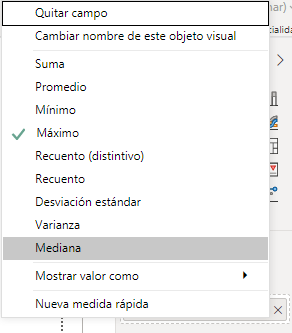



## 5) Armar y visualizar los costos de las rutas por unidad de producto transportado

### Para el desarrollo de esta visualización se requerira de trabajar con tres tablas ('routes_available', 'routes_endtoend' y 'routes_segment',). Una primera opción podria ser armar una tabla nueva a partir de estas tres o una segunda seria corregir las tablas de forma de generar las interacciones necesarias para un trabajo en conjunto entre tablas. (Cualquiera de las dos opciones son viables, pero se desarrollará esta ultima, porque la primera ya fue cubierta en el primer ejercicio)

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/'
nombres = ['routes_available', 'routes_endtoend', 'routes_segment']
for i in nombres:
    archivo = pd.read_csv(url + i + '.csv', sep=';')
    df = pd.DataFrame(archivo)
    print(i, '\n')
    print(df, '\n')



routes_available 

        RouteID StartRoute MiddleRoute     EndRoute  RailUse
0      Route001   Plant001       DC001  Customer001        0
1      Route002   Plant002       DC002  Customer001        1
2      Route003   Plant001       DC004  Customer001        0
3      Route004   Plant001       DC004  Customer001        1
4      Route005   Plant002       DC002  Customer001        0
..          ...        ...         ...          ...      ...
115  Route00116   Plant001         NaN  Customer007        0
116  Route00117   Plant002         NaN  Customer007        1
117  Route00118   Plant004       DC001  Customer002        0
118  Route00119   Plant001       DC001  Customer003        0
119  Route00120   Plant001       DC002  Customer007        1

[120 rows x 5 columns] 

routes_endtoend 

       Start          End  EndToEndCostPerLiter
0   Plant001  Customer001                     9
1   Plant002  Customer001                     7
2   Plant002  Customer002                     9
3   Plant003 

**Quiza lo primero que podemos notar es que en la estructura de la tabla de rutas disponibles se encuentran valores nulos. Luego, una segunda observación es que las tablas de viajes directos y viajes por segmentos, no cuentan con un identificador unico, y es en estas donde se encuentran almacenado los costos por la realizacion de los viajes.** En este sentido lo primero qu podriamos hacer es corregir que las ultimas dos tablas no posean un identificador unico, y luego ver como este identificador lo podriamos relacionar con los datos de la primera tabla.

**Nota: Mirando en mayor profundidad los datos contenidos en la tabla de los segmentos se puede observar que existen combinaciones directas entre una planta y un cliente (esto hace pensar que a los viajes directos se le debe sumar un extra, extrayendose este de la tabla de los viajes directos).**

Para la creación del identificador de las tablas, notar que no nos sirve utilizar el truco anterior (juntar la informacion contenida en dos columnas, se podria hacer si ademas de suma la columna del modo de transporte), por lo que haremos una identificacion sencilla, numerando desde la primera fila hasta el final.

Tabla de segmentos
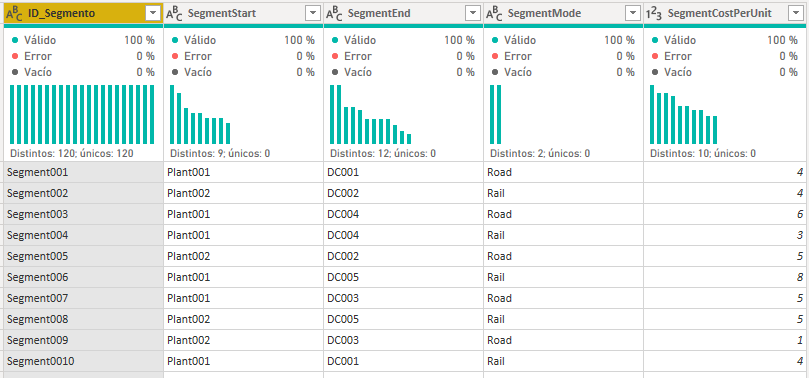

**Observacion: Para corroborar que los datos fueran unicos se creo una columna combinada con la estrucutra 'inicio - final - modo' y se encontraron valores repetidos. (Con lo cual fue necesario elimanar estos datos duplicados)**
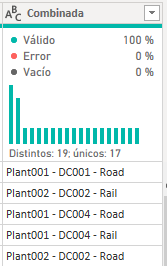

Si hacemos click en la tabla nos aparecera la siguiente información.
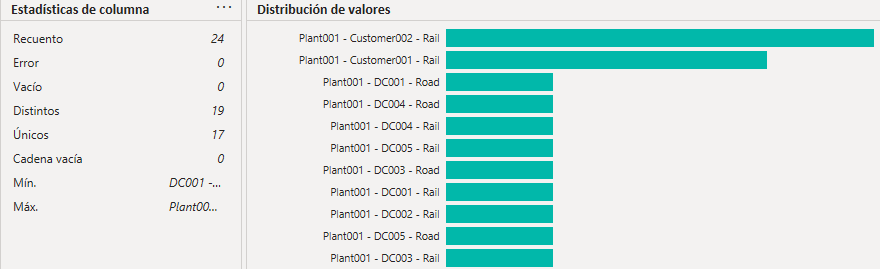

**Desde la distribucion de los datos se puede observar que un dato se encuentra repetido 4 veces y otro 2 veces. 
Para eliminar los datos duplicados**
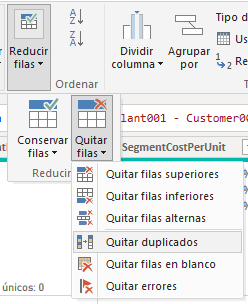

### Otro problema que se detecto fue al momento de hacer las relaciones entre tablas. sucedio que entre la tabla de rutas disponibles y la de los segmentos, se esparaba poder establecer una doble combinación entre estas tablas, para asi poder identificar por separado los valores trayectos.

### Debido a que se probaron varias opciones sin lograr a tener exito en esta tarea, se optó por duplicar la tabla de los segmentos y asi, para cada cambinación, tendrá que consultar una tabla individual. Esto puede quedar mas claro si vamos a la sección 'Modelo'. (Esta no es la mejor opción, puesto que se debe cargar una tabla adicional al modelo)
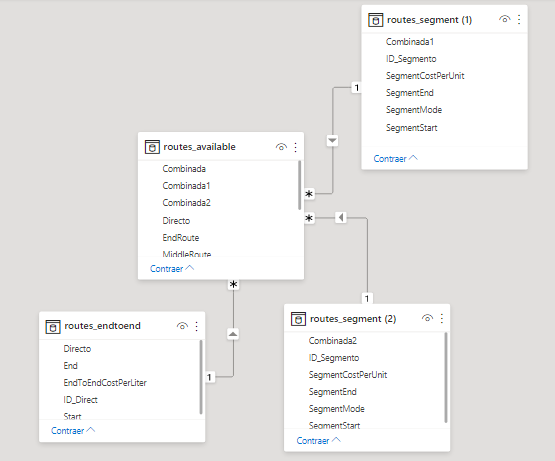



Tabla de trayectos directos
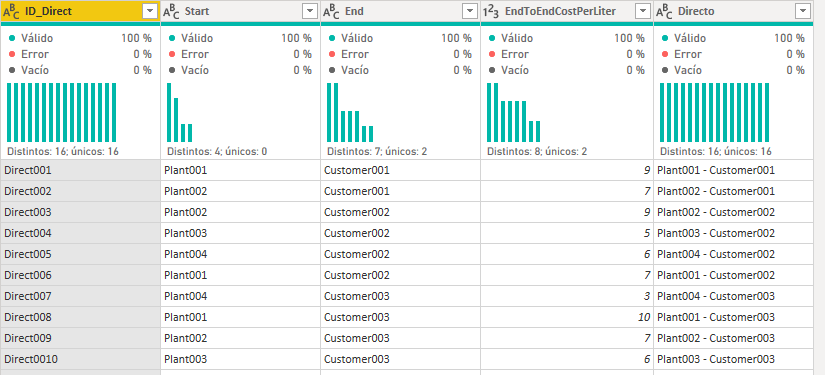

**Nota: Verificar que para todas las tablas, el identificador siempre cuente con todos sus valores unicos.**

### Ahora debemos establecer las conexiones necesarias para la tabla que contiene las rutas. Como resultado se agregaron las siguientes columnas con el fin de establecer la conectividad entre tablas.
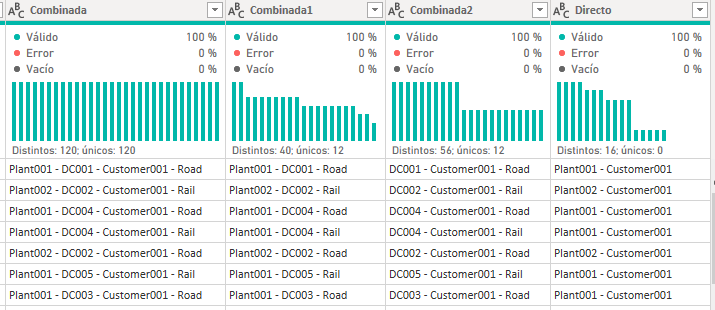
De esta manera la tabla 'routes_available' queda relacionada con una primera tabla de segmentos ('Segments (1)') por la columna 'Combinada1', sucede lo mismo con la tabla 'Segments (2)' a traves de la columna 'Combinada2'. Por ultimo, se establece la conexion con la tabla 'routes_EndToEnd ' a traves de la columna 'Directo'.

### Ya en el informe se armó una tabla para la presentar la información conjunta entre las tablas y se creo una nueva medida para el calculo del costo total por la utilización de la ruta. (Nota: La funcion RELATED() no mostrará las tablas, si las relaciones en el modelo no fueron correctamente establecidas)
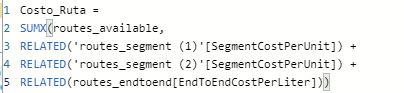

## Por ultimo, a continuación se expone el resultado obtenido
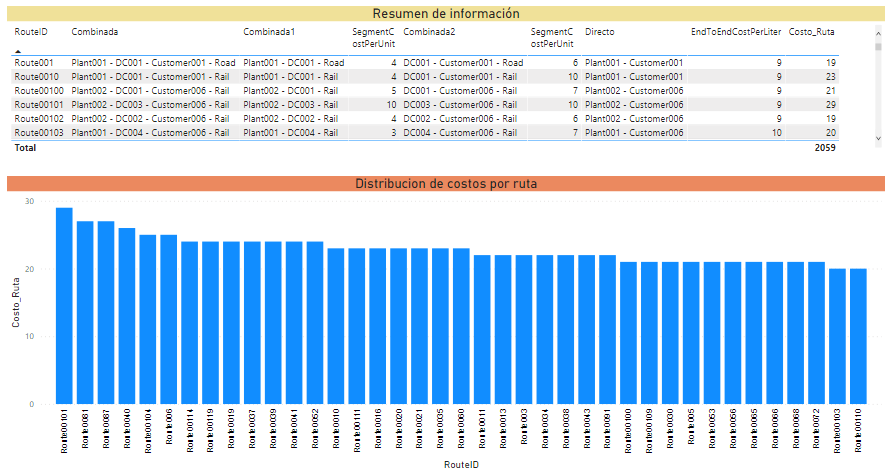